In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline

## Problem Description
A boundary at $y=0$ starts to oscillate at time $t=0$ with a velocity $U(y=0,t)=U_0 sin(2\pi ft)$. The domain is infinte in all directions except for $y<0$.
<img src="pic1.png"alt="Drawing" style="width: 400px;"/>

#### Governing equations
The problem will be analyzed using the vorticity-streamfunction formulation:
$$u=\frac{\partial{\psi}}{\partial{y}} \qquad v=-\frac{\partial{\psi}}{\partial{x}}$$

$$\vec{\omega}=\nabla\times\vec{u}=-\nabla^2\psi$$

$$\frac{\partial{\vec{\omega}}}{\partial{t}}+(\vec{u}\cdot\nabla)\vec{\omega}=\nu\nabla^2\vec{\omega}$$

The following assumptions/conditions will be used to simplify the analysis:
- 2 dimensional flow with no body forces
- $v=0$ - fluid only moves horizontally
- $u=u(y,t)$ - horizontal velcoity is constant along any horizontal plane
- $u(y=0,t)=U_0 \sin(2\pi ft)$ - no-slip condition at the boundary $y=0$

Using these assumptions, the equations simplify to become:

$$u=\frac{\partial{\psi}}{\partial{y}} \qquad v=-\frac{\partial{\psi}}{\partial{x}}=0$$

$$\omega=-\frac{\partial{u}}{\partial{y}}=-\frac{\partial^2{\psi}}{\partial{y^2}}$$

$$\frac{\partial{\omega}}{\partial{t}}=\nu\frac{\partial^2{\omega}}{\partial{y^2}}$$

#### Initial conditions
Initially, the fluid is at rest everywhere, i.e. $u(y,t=0)=0$. As a result, the stream-function is an arbitrary constant and vorticity is 0 everywhere. The streamfunction can be fixed to $0$ initially as well.

$$\psi(y,t=0)=\omega(y,t=0)=0$$

#### Boundary conditions 

The system is second-order in space. So, two boundary conditions are required. The boundary condition for velocity at $y=0$ has been defined earlier. Once again, the streamfunction can be set to $0$. For vorticity at $y=0$, the Taylor series approximation has to be invoked: 

$$\psi(y=\Delta{y},t)=\psi(y=0,t)+\frac{\partial{\psi}}{\partial{y}}\Delta{y}+\frac{\partial^2{\psi}}{\partial{y^2}}\frac{\Delta{y}^2}{2}+...$$

Using the streamfunction-vorticity relationship and the streamfunction-velocity relationship, the vorticity at $y=0$ can be approximated by:

$$\omega(y=0,t)\approx 2\left(\frac{U_0 \sin(2\pi ft)}{\Delta y}-\frac{\psi(y=\Delta y,t)}{\Delta y^2}\right)$$


The second boundary could be taken at $y\rightarrow\infty$. As $y\rightarrow\infty$, $u\rightarrow0$. So, $\omega\rightarrow 0$ and $\partial{\psi}/\partial{y}\rightarrow 0$.

$$\omega(y_\infty,t)\rightarrow 0$$

$$\psi(y_\infty,t)\rightarrow \psi(y_\infty+\Delta{y},t)$$

### Non-dimensionalization
Non-dimensionalizing the equations will not only simplify the analysis but will lead to the understanding of the important characteristics of the flow.
- $y\;[L] = \sqrt{\frac{\nu}{\Omega}}\hat{y}$
- $t\;[T] = \Omega^{-1}\hat{t}$ where $\Omega=2\pi f$
- $u\;[LT^{-1}] = \sqrt{\nu \Omega}\hat{u}$ 
- $\omega\;[T^{-1}] =\Omega\hat{\omega}$
- $\psi\;[L^2T^{-1}] = \nu\hat{\psi}$

#### Governing equations

This simplifies the equations further:

$$\frac{\partial{\hat{\psi}}}{\partial{\hat{y}}}=\hat{u} \qquad \frac{\partial{\hat{\psi}}}{\partial{\hat{x}}}=0$$

$$\hat{\omega} = -\frac{\partial{\hat{u}}}{\partial{\hat{y}}}=-\frac{\partial^2{\hat{\psi}}}{\partial{\hat{y}^2}}$$

$$\frac{\partial{\hat{\omega}}}{\partial{\hat{t}}}=\frac{\partial^2{\hat{\omega}}}{\partial{\hat{y}^2}}$$

#### Initial conditions
The non-dimensional initial conditions are:

$$\hat{u}(\hat{y},\hat{t}=0)=\hat{\psi}(\hat{y},\hat{t}=0)=\hat{\omega}(\hat{y},\hat{t}=0)=0$$

#### Boundary conditions
The non-dimensional boundary conditions at $\hat{y}=0$ are:

$$\hat{u}(\hat{y}=0,\hat{t}) = H\sin(\hat{t})$$

$$\hat{\psi}(\hat{y}=0,\hat{t})=0$$

$$\hat{\omega}(\hat{y}=0,\hat{t})\approx 2\left(\frac{H \sin(\hat{t})}{\Delta \hat{y}}-\frac{\hat{\psi}(\hat{y}=\Delta \hat{y},\hat{t})}{\Delta \hat{y}^2}\right)$$

The term $H$ is a non-dimensional number which can be defined in the following manner:

$$H \equiv \frac{U_0}{\sqrt{\nu\Omega}}=\sqrt{\frac{1}{2\pi}\left(\frac{U_0 L}{\nu}\right)\left(\frac{U_0}{fL}\right)}=\sqrt{\frac{Re}{2\pi St}}$$

It is a ratio of two dimensional numbers: Reynolds number $(Re)$ and Strouhal number $(St)$. While Reynolds number characterizes the ratio of inertial forces to viscous forces, Strouhal number characterizes oscillating flows. Since both these behaviours are present in the flow that is being analyzed, it is no surprise that the non-dimensional number governing the flow is a combination of both. The beauty of working with non-dimensional parameters is that we can neglect the individual flow/fluid properties and concern ourselves only with the non-dimensional number, $H$.

As $\hat{y}\rightarrow\infty$,

$$\hat{u}(\hat{y}_\infty,\hat{t})=\hat{\omega}(\hat{y}_\infty,\hat{t})\rightarrow 0$$

$$\hat{\psi}(\hat{y}_\infty,\hat{t})\rightarrow\hat{\psi}(\hat{y}_\infty+\Delta{\hat{y}},\hat{t})$$

### Discretization
*Vorticity transport equation*

$$\hat{\omega}^{n+1}_{j}=\hat{\omega}^{n}_{j}+\frac{\Delta{\hat{t}}}{\Delta{\hat{y}^2}}\left(\hat{\omega}^{n}_{j+1}-2\hat{\omega}^{n}_{j}+\hat{\omega}^{n}_{j-1}\right)$$

The CFL condition for the above discretization can be shown to be:

$$\frac{\Delta\hat{t}}{\Delta\hat{y}^2}\le\frac{1}{2}$$


*Vorticity-streamfunction relationship*

$$\left(\hat{\psi}^{n+1}_{j+1}-2\hat{\psi}^{n+1}_{j}+\hat{\psi}^{n+1}_{j-1}\right)=-{\Delta{\hat{y}^2}}\hat{\omega}^{n+1}_{j}$$

While the vorticity transport equation can be found explicity by time-marching the vorticity transport equation, the streamfunction has to be solved implicitly from the vorticity computed at the next time step. The discretization of the vorticity-streamfunction relationship could be written in the form of a matrix multiplication $[A][\hat{\psi}]=[B]$:

$$\left(\begin{array}{ccc} 
-2 & 1 & 0 & 0 & \cdots & 0 \\
1 & -2 & 1 & 0 & \cdots & 0 \\
0 & 1 & -2 & 1 & \cdots & 0 \\
\vdots & \vdots\ & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \cdots & 1 \\
0 & 0 & 0 & 0 & \cdots & -1 \\
\end{array}\right)\left(\begin{array}{ccc}
\hat{\psi}^{n+1}_{1} \\
\hat{\psi}^{n+1}_{2} \\
\hat{\psi}^{n+1}_{3} \\
\vdots \\
\hat{\psi}^{n+1}_{ny-1} \\
\hat{\psi}^{n+1}_{ny} \end{array}\right)=-\Delta{\hat{y}^2}\left(\begin{array}{ccc}
\hat{\omega}^{n+1}_{1} \\
\hat{\omega}^{n+1}_{2} \\
\hat{\omega}^{n+1}_{3} \\
\vdots \\
\hat{\omega}^{n+1}_{ny-1} \\
\hat{\omega}^{n+1}_{ny} \end{array}\right)$$

The matrices start from the grid point $j=1$ rather than $j=0$ because, it has already been defined that  $\hat{\psi}^{n}_{0}=0$. So, neglecting the it and the corresponding column in $[A]$ does not affect the analysis.

Also, note that the botom-right corner element of the coefficient matrix is $-1$ instead of the $-2$. The reason is that  $\hat{\omega}^{n+1}_{ny}$ depends on $\hat{\psi}^{n+1}_{ny+1}$ which is beyond the domain. However, it was shown earlier that as $\hat{y}\rightarrow\infty$, $\hat{\psi}$ approaches a constant value. So, for sufficiently large $\hat{y}$, it can be assumed that $\hat{\psi}^{n+1}_{ny+1}\approx\hat{\psi}^{n+1}_{ny}$. As a result:

$$-\Delta{\hat{y}^2}\hat{\omega}^{n+1}_{ny}=\left(\hat{\psi}^{n+1}_{ny+1}-2\hat{\psi}^{n+1}_{ny}+\hat{\psi}^{n+1}_{ny-1}\right)\approx\left(\hat{\psi}^{n+1}_{ny}-2\hat{\psi}^{n+1}_{ny}+\hat{\psi}^{n+1}_{ny-1}\right)=\left(-\hat{\psi}^{n+1}_{ny}+\hat{\psi}^{n+1}_{ny-1}\right)$$

The following functions are designed to create the tri-diagonal coefficient matrix $[A]$ and solve it using [Thomas algorithm](http://www3.ul.ie/wlee/ms6021_thomas.pdf), respectively.

In [2]:
# Solve [A][X]=[B]
def CM(N):
    # Build coefficient matrix, [A]
    d = -2*np.ones(N) # main diagonal
    d[N-1] = -1 # last element of main diagonal
    d_n = d.copy()
    l = np.ones(N-1) # lower diagonal
    u = np.ones(N-1) # upper diagonal
    
    # Forward elimination of lower-diagonal elements
    for i in range(1,N):
        d_n[i] = d[i] - u[i-1]*l[i-1]/d_n[i-1]
        
    return l, d_n, u

def TDMA(B,l,d_n,u):
    N = np.size(B)   
    
    # THOMAS ALGORITHM
    # Forward elimination of lower-diagonal elements
    for i in range(1,N):
        B[i] = B[i] - B[i-1]*l[i-1]/d_n[i-1]
    
    X = np.zeros_like(B)
    # Backward substitution
    X[-1] = B[-1]/d_n[-1]
    for i in range (N-2,-1,-1):
        X[i] = (B[i] - u[i]*X[i+1])/d_n[i]
        
    return X

### Comparison with analytical solution (steady-state)

When $\hat{t}\gg 1$ (or $t\gg\Omega^{-1}$), the [analytical solution for velocity](http://uploads.tombertalan.com/13spring2013/557cbe557/materials/ExactSolutionsAndLubricationApproximation.pdf)  is given by the following expression where $k=\sqrt{\Omega/2\nu}$:

$$u_{ss} (y,t)=U_0 e^{-ky} \sin(\Omega t - ky)$$

In non-dimensional form, it may be expressed as:

$$\hat{u}_{ss} (\hat{y},\hat{t})=H e^{-\frac{\hat{y}}{\sqrt{2}}} \sin\left(\hat{t} - \frac{\hat{y}}{\sqrt{2}}\right)$$

Correspondingly, the non-dimensional vorticity and streamfunction can be derived using the relationships derived above:

$$\hat{\omega}_{ss}(\hat{y},\hat{t}) = \frac{H}{\sqrt{2}}e^{-\frac{\hat{y}}{\sqrt{2}}} \left[\sin\left(\hat{t} - \frac{\hat{y}}{\sqrt{2}}\right) + \cos\left(\hat{t} - \frac{\hat{y}}{\sqrt{2}}\right)\right] $$

$$\hat{\psi}_{ss}(\hat{y},\hat{t}) = \frac{H}{\sqrt{2}}e^{-\frac{\hat{y}}{\sqrt{2}}} \left[\cos\left(\hat{t} - \frac{\hat{y}}{\sqrt{2}}\right) - \sin\left(\hat{t} - \frac{\hat{y}}{\sqrt{2}}\right)\right] - \frac{H}{\sqrt{2}}\left[\cos\left(\hat{t}\right) - \sin\left(\hat{t}\right)\right] $$

In [3]:
# Solve the start-up flow problem for given initial conditions along with steady-state analytical solutions
def solver(vor,sfn,nt,dt,ny,dy,H):
    t = time.time() # start timing computation
    
    vor_n = vor.copy()
    sfn_n = sfn.copy()

    # Create the coefficient maxtrix [A] of order (ny-1)
    l, d_n, u = CM(ny-1)

    for i in range(1,nt+1):      
        # Time-marhcing for vorticity transport equation
        vor_n[1:-1] = vor[1:-1] + dt*(vor[2:] + vor[:-2] - 2*vor[1:-1])/dy/dy

        # Solving for streamfunction at (n+1)th step
        B = -vor_n[1:]*dy*dy
        sfn_n[1:] = TDMA(B,l,d_n,u)
        vor_n[0] = 2*(H*np.sin(i*dt) - sfn_n[1]/dy)/dy # vorticity boundary condition at y=0
        vor = vor_n.copy()
         
    # Solve for computed velocity
    u = np.zeros(ny)
    u[0] = H*np.sin(nt*dt)
    u[1:-1] = (sfn_n[2:] - sfn_n[:-2])/2/dy
    u[-1] = 0
    
    # Analytical solution for vorticity (steady-state)
    r = np.sqrt(1./2.)
    tt = nt*dt # total time
    vor_a = H*r*np.exp(-r*y)*(np.sin(tt-r*y)+np.cos(tt-r*y))
    
    # Analytical solution for streamfunction (steady-state)
    sfn_a = H*r*(np.exp(-r*y)*(np.cos(tt-r*y)-np.sin(tt-r*y))-(np.cos(tt)-np.sin(tt)))
    
    # Analytical solution for velocity (steady-state)
    u_a = H*np.exp(-r*y)*np.sin(tt-r*y)
    
    t = time.time() - t # stop timing computation
    print 'Done (' + ('%.2f' % t) + 's)' # display computation time
    
    return vor, sfn_n, u, vor_a, sfn_a, u_a

In [4]:
Y = 15. # domain: x characteristic lengths (must be sufficiently large)     
ny = 201 # no. of grid pts.
dy = Y/(ny-1) # cell size
y = np.linspace(0,Y,ny)

dt = 0.001 # size of time step

nu = 0.01
U0 = 1.
f = 1.
w = 2*np.pi*f
H = U0/np.sqrt(nu*w)
print 'H = ', ('%.2f' %H)

CFL = dt/dy/dy
if CFL <= 0.5:
    print 'CFL = ', ('%.2f' %CFL), 'is OK.'

# Initial conditions
vor_0 = np.zeros(ny)
sfn_0 = np.zeros(ny)

ntpc = int(2*np.pi/dt) # no. of time steps per cycle (2pi)

vor_1, sfn_1, u_1, vor_1a, sfn_1a, u_1a = solver(vor_0,sfn_0,ntpc/10,dt,ny,dy,H) # solve for 10% of 1st cycle
vor_2, sfn_2, u_2, vor_2a, sfn_2a, u_2a = solver(vor_0,sfn_0,ntpc/2,dt,ny,dy,H) # solve for 50% of 1st cycle
vor_3, sfn_3, u_3, vor_3a, sfn_3a, u_3a = solver(vor_0,sfn_0,ntpc,dt,ny,dy,H) # solve for 1st cycle
vor_4, sfn_4, u_4, vor_4a, sfn_4a, u_4a = solver(vor_3,sfn_3,ntpc,dt,ny,dy,H) # solve for 2nd cycle
vor_5, sfn_5, u_5, vor_5a, sfn_5a, u_5a = solver(vor_4,sfn_4,3*ntpc,dt,ny,dy,H) # solve for 5th cycle
vor_6, sfn_6, u_6, vor_6a, sfn_6a, u_6a = solver(vor_5,sfn_5,5*ntpc,dt,ny,dy,H) # solve for 10th cycle

H =  3.99
CFL =  0.18 is OK.
Done (0.51s)
Done (2.43s)
Done (4.31s)
Done (4.99s)
Done (13.98s)
Done (19.90s)


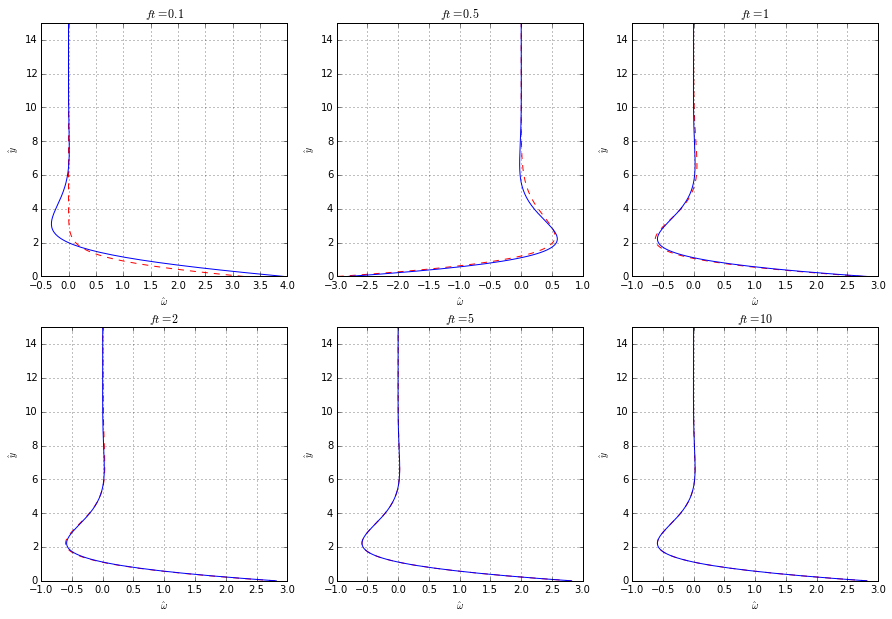

In [24]:
# Plotting computed and analytical vorticities
fig = plt.figure(figsize=(15,10), dpi=100)
fig.add_subplot(231)
plt.plot(vor_1,y,'--r',vor_1a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.1$'), plt.xlabel('$\hat{\omega}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(232)
plt.plot(vor_2,y,'--r',vor_2a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.5$'), plt.xlabel('$\hat{\omega}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(233)
plt.plot(vor_3,y,'--r',vor_3a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=1$'), plt.xlabel('$\hat{\omega}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(234)
plt.plot(vor_4,y,'--r',vor_4a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=2$'), plt.xlabel('$\hat{\omega}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(235)
plt.plot(vor_5,y,'--r',vor_5a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=5$'), plt.xlabel('$\hat{\omega}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(236)
plt.plot(vor_6,y,'--r',vor_6a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=10$'), plt.xlabel('$\hat{\omega}$'), plt.ylabel('$\hat{y}$')

plt.show()

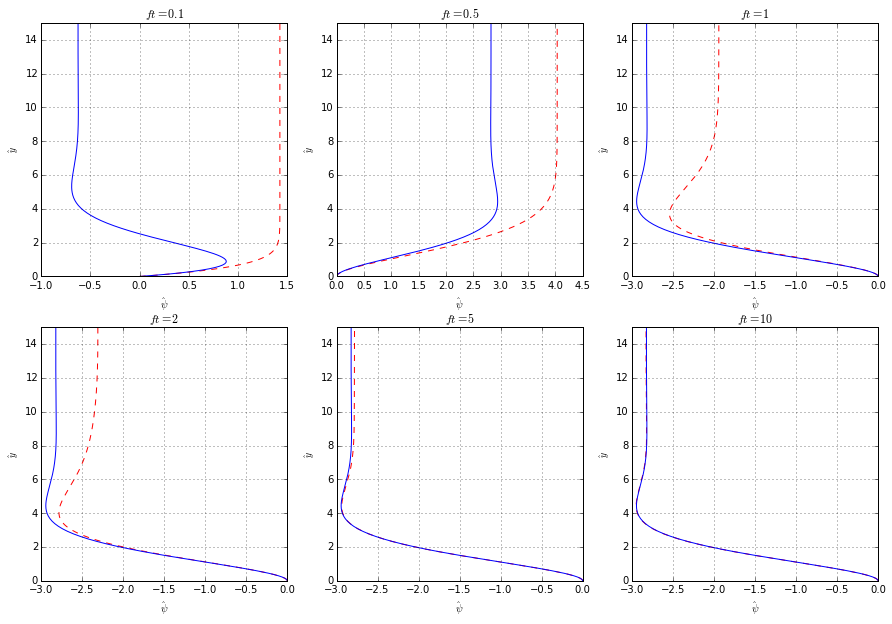

In [18]:
# Plotting computed and analytical streamfunctions
fig = plt.figure(figsize=(15,10), dpi=100)
fig.add_subplot(231)
plt.plot(sfn_1,y,'--r',sfn_1a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.1$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(232)
plt.plot(sfn_2,y,'--r',sfn_2a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.5$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(233)
plt.plot(sfn_3,y,'--r',sfn_3a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=1$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(234)
plt.plot(sfn_4,y,'--r',sfn_4a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=2$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(235)
plt.plot(sfn_5,y,'--r',sfn_5a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=5$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(236)
plt.plot(sfn_6,y,'--r',sfn_6a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=10$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')

plt.show()

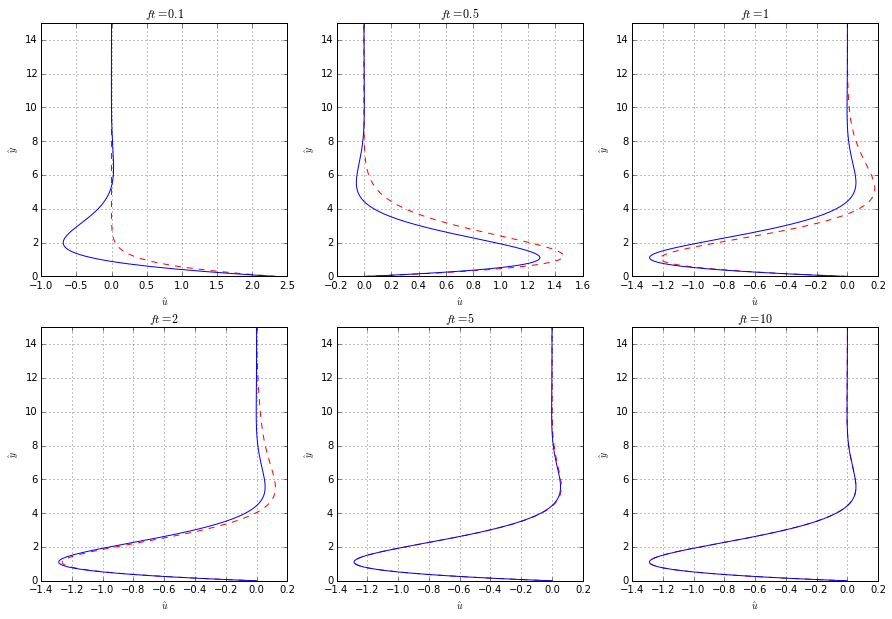

In [19]:
# Plotting computed and analytical velocities
fig = plt.figure(figsize=(15,10), dpi=100)
fig.add_subplot(231)
plt.plot(u_1,y,'--r',u_1a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.1$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(232)
plt.plot(u_2,y,'--r',u_2a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.5$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(233)
plt.plot(u_3,y,'--r',u_3a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=1$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(234)
plt.plot(u_4,y,'--r',u_4a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=2$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(235)
plt.plot(u_5,y,'--r',u_5a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=5$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(236)
plt.plot(u_6,y,'--r',u_6a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=10$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')

plt.show()

### Results & Discussion
It can be seen from the results that the non-dimensional vorticity $\hat{\omega}$ has reached its steady-state value in less than 2 oscillations while the non-dimensional velocity $\hat{u}$ and streamfunction $\hat{\psi}$ differ from the analytical solution at $ft=2$. $\hat{\omega}$ was calculated purely by time-marching the vorticity transport equation (except for the boundary condition at $\hat{y}=0$). $\hat{\psi}$, on the other hand, was calculated by solving the system of linear equations derived from the $\hat{\psi}-\hat{\omega}$ relationship. Since the computed values of $\hat{\omega}$ were used to solve for $\hat{\psi}$ at each time step, the errors are bound to be higher in $\hat{\psi}$. Nevertheless, at higher times ($ft=5$, $ft=10$), the computed values of $\hat{\psi}$ have reached the steady-state values.

It can also be seen from the vorticity and velocity plots that the effect of the oscillating boundary is limited to about 8-10 characteristic lengths $\hat{y}_c=\sqrt{\nu/\Omega}$. Beyond this, both the vorticity and velocity are nearly 0 in accordance with what has been mentioned previously.

The velocity plot at $ft=0.1$ clearly shows the developing boundary layer profile and, the velocity plot at $ft=0.5$ shows the transport of momentum in the form of a wave. Obviously, this wave will lose its energy to viscous dissipation as it progesses in the positive $\hat{y}$ direction.

#### Analytical solution (transient)
There is an analytical solution for transient scenario for $\hat{u}(\hat{y}=0,\hat{t})=H\cos{\hat{t}}$ in this [source](http://uploads.tombertalan.com/13spring2013/557cbe557/materials/ExactSolutionsAndLubricationApproximation.pdf). However, it does not provide an anlytical solution for $\hat{u}(\hat{y}=0,\hat{t})=H\sin{\hat{t}}$. The inverse Laplace transform necessary to solve the transient problem was not available in the [standard table of integral transforms](http://authors.library.caltech.edu/43489/1/Volume%201.pdf) either. So, the analytical solution to the transient problem will not be analyzed.